<a href="https://colab.research.google.com/github/pranay-th/MNIST_Classification/blob/main/keras_CNN_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K

(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Model 1 - Handwrittten Characters Recognition using TensorFlow Keras
1-Load data
2-Import data
3-Preprocess and analyse data
4-Split data
5-Create Model layers
6-Train the model
7-Validate model
8-Create Tkinter GUI for single predictions(Optional)

In [2]:
import matplotlib.pyplot as plt

In [3]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)

y_train=keras.utils.to_categorical(y_train,num_classes=10)
y_test=keras.utils.to_categorical(y_test,num_classes=10)
x_train=x_train.astype('float64')
x_test=x_test.astype('float64')

x_train/=255
x_test/=255


In [4]:

batch_size=128
num_classes=10
epochs=10
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [5]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
hist=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
model.save('mnist1')

Epoch 1/10
469/469 [==============================] - 21s 19ms/step - loss: 2.2629 - accuracy: 0.2072 - val_loss: 2.2037 - val_accuracy: 0.4902
Epoch 2/10
469/469 [==============================] - 8s 18ms/step - loss: 2.1378 - accuracy: 0.4108 - val_loss: 2.0032 - val_accuracy: 0.6665
Epoch 3/10
469/469 [==============================] - 8s 18ms/step - loss: 1.8484 - accuracy: 0.5637 - val_loss: 1.5266 - val_accuracy: 0.7569
Epoch 4/10
469/469 [==============================] - 8s 18ms/step - loss: 1.3554 - accuracy: 0.6503 - val_loss: 0.9588 - val_accuracy: 0.8119
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 1.0021 - accuracy: 0.7054 - val_loss: 0.6897 - val_accuracy: 0.8382
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.8323 - accuracy: 0.7448 - val_loss: 0.5702 - val_accuracy: 0.8554
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.7343 - accuracy: 0.7718 - val_loss: 0.5035 - val_accuracy: 0.868

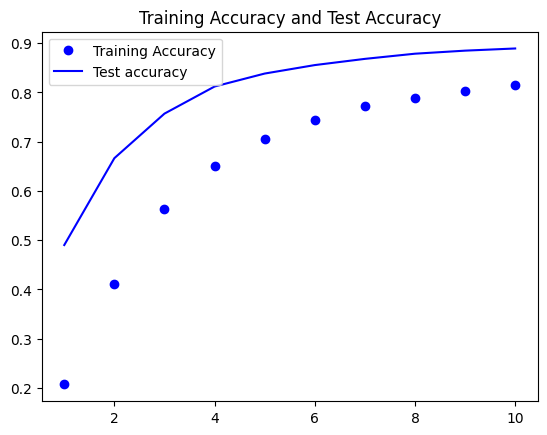

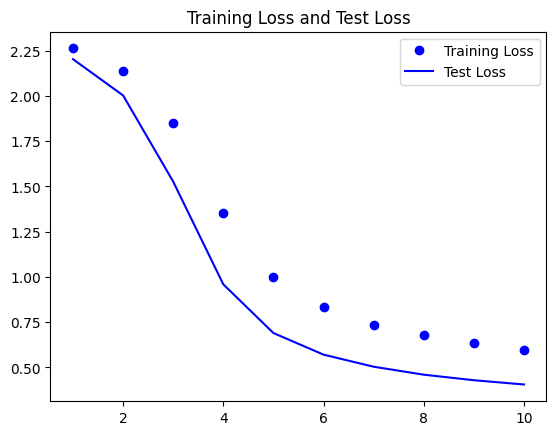

In [8]:
acc=hist.history['accuracy']
los=hist.history['loss']
val_acc=hist.history['val_accuracy']
val_los=hist.history['val_loss']

ep=range(1,len(acc)+1)

plt.plot(ep,acc,'bo',label="Training Accuracy")
plt.plot(ep,val_acc,'b',label="Test accuracy")
plt.title("Training Accuracy and Test Accuracy")
plt.legend()
plt.show()

plt.plot(ep,los,'bo',label="Training Loss")
plt.plot(ep,val_los,'b',label="Test Loss")
plt.title("Training Loss and Test Loss")
plt.legend()
plt.show()

In [7]:
import numpy as np
import tensorflow as tf

all_predictions = np.array([])
all_labels = np.array([])
predictions = model.predict(x_train)
predictions = np.argmax(predictions, axis = 1)
all_predictions = np.concatenate([all_predictions, predictions])
labels = np.argmax(y_train, axis = 1)
all_labels = np.concatenate([all_labels, labels])

tf.math.confusion_matrix(all_predictions, all_labels)

1875/1875 [==============================] - 4s 2ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[5693,    0,   89,   47,    5,  123,   64,   42,   43,   61],
       [   8, 6519,   57,   69,   38,   76,  100,  131,  238,   79],
       [  15,   41, 5045,  192,   45,   46,   57,  100,   72,   54],
       [  21,   45,   93, 5291,    2,  493,    2,   17,  254,  105],
       [  15,    5,  139,    8, 5077,  110,   41,   89,   37,  158],
       [  18,   25,   10,  152,    3, 4095,  126,    6,  166,   16],
       [  70,   14,  206,   45,  130,  142, 5500,    4,   53,    7],
       [   4,   10,  117,   88,   27,   15,    2, 5516,   59,  220],
       [  69,   71,  190,  175,   28,  261,   25,   41, 4781,   62],
       [  10,   12,   12,   64,  487,   60,    1,  319,  148, 5187]],
      dtype=int32)>